<a href="https://colab.research.google.com/github/abdipourasl/Alzheimer/blob/main/AD_wPLI_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
# Enable mixed precision
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Then continue your model definition and training as usual



In [ ]:
import tensorflow
# Enable XLA (Accelerated Linear Algebra)
tensorflow.config.optimizer.set_experimental_options({'auto_mixed_precision': True})


In [ ]:
# !pip install tensorflow-addons
# import tensorflow_addons as tfa

# model = tf.keras.Sequential([
#     tfa.layers.WeightNormalization(layers.Conv2D(64, (3, 3), activation='relu', padding='same')),
#     # Add other layers and checkpoint wrappers as needed
# ])


# 80% for Train, 20% for Test

## wPLI Images

### Load PLV Images

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import gdown
# file_id = '1jWL4uB1PWY_k6HcvngN-b66nkUL7hz9H' #Delta_Pre_EC
# file_id = '1nE92WetD0IsKuEoQLU4RaQ7pdvClhFC_' #Full_Pre_EC
file_id = '1s2atZ3Y42JbItJ0Mh2AAlBDP3giaQLPY' #All_Pre_EC

destination = 'wPLI_EO_Pre.rar'  # Replace with your desired file name and extension
gdown.download(id=file_id, output=destination, quiet=False)



Downloading...
From (original): https://drive.google.com/uc?id=1s2atZ3Y42JbItJ0Mh2AAlBDP3giaQLPY
From (redirected): https://drive.google.com/uc?id=1s2atZ3Y42JbItJ0Mh2AAlBDP3giaQLPY&confirm=t&uuid=eba3c065-6de5-470f-9539-cd41bf6c44b9
To: /content/wPLI_EO_Pre.rar
100%|██████████| 3.02G/3.02G [00:56<00:00, 53.6MB/s]


'wPLI_EO_Pre.rar'

In [ ]:
!unrar x 'wPLI_EO_Pre.rar'

Streaming output truncated to the last 5000 lines.
Extracting  wPLI/Adjacency Matrices/theta/subject_086_trial_32_theta_adjacency_matrix.jpg      90%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_086_trial_33_theta_adjacency_matrix.jpg      90%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_086_trial_34_theta_adjacency_matrix.jpg      90%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_086_trial_35_theta_adjacency_matrix.jpg      90%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_086_trial_36_theta_adjacency_matrix.jpg      90%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_086_trial_37_theta_adjacency_matrix.jpg      90%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_086_trial_38_theta_adjacency_matrix.jpg      90%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_086_trial_39_theta_adjacency_matrix.jpg      90%  OK 
Extracting  wPLI/Adjacency Matrices/theta/sub

In [ ]:
!unrar x '/content/drive/MyDrive/Alzheimer 2/wPLI Images/EC - Pre/Adjacency Matrices.rar'


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open /content/drive/MyDrive/Alzheimer 2/wPLI Images/EC - Pre/Adjacency Matrices.rar
No such file or directory
No files to extract


### Load Demographic & Tests

In [ ]:
! pip install tensorflow
import gdown
file_id = '1ZLgcSgR2QIYf3uNnZgiq1uQ3itsaQEpT'
destination = 'tests.xlsx'
gdown.download(id=file_id, output=destination, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZLgcSgR2QIYf3uNnZgiq1uQ3itsaQEpT
To: /content/tests.xlsx
100%|██████████| 17.4k/17.4k [00:00<00:00, 26.2MB/s]


'tests.xlsx'

### Seperate data *


In [ ]:
import os
import shutil
from pathlib import Path
from PIL import Image  # Pillow library for image processing

# Path to the original images
original_images_path = Path('/content/wPLI/Adjacency Matrices/theta')

# Path to save the organized and cropped images
organized_cropped_path = Path('/content/Organized_Images')

# Create the destination directory if it doesn't exist
organized_cropped_path.mkdir(parents=True, exist_ok=True)

#### Crop

In [ ]:
# Calculate the crop box coordinates
left = 140
upper = 50
right = 875 - 205  # 660
lower = 656 - 78   # 578

crop_box = (left, upper, right, lower)  # (140, 50, 660, 578)

print(f"Crop Box Coordinates: {crop_box}")


Crop Box Coordinates: (140, 50, 670, 578)


#### Organize data

In [ ]:
# #### Organize data for first 10 subjects only

# # Iterate through all files in the original_images_path
# for image_path in original_images_path.iterdir():
#     # Check if the current path is a file and has a valid image extension
#     if image_path.is_file() and image_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
#         # Example filename format: subject_001_trial_1.jpg
#         # Split the filename to extract parts
#         parts = image_path.stem.split('_')  # 'stem' gives the filename without extension

#         # Ensure the filename has at least 3 parts and starts with 'subject'
#         if len(parts) >= 3 and parts[0].lower() == 'subject':
#             subject_number_str = parts[1]
#             try:
#                 subject_number = int(subject_number_str)
#             except ValueError:
#                 print(f"Skipping file with invalid subject number: {image_path.name}")
#                 continue

#             # Only process the first 10 subjects
#             if subject_number == 15 or subject_number == 17 or subject_number == 19 or subject_number > 20:
#                 continue

#             # Define the subject folder name (zero-padded)
#             subject_folder_name = f'subject_{subject_number_str.zfill(3)}'
#             subject_folder = organized_cropped_path / subject_folder_name

#             # Create the subject folder if it doesn't exist
#             subject_folder.mkdir(exist_ok=True)

#             # Define the destination path for the cropped image
#             destination = subject_folder / image_path.name

#             try:
#                 # Open the image using PIL
#                 with Image.open(image_path) as img:
#                     # Crop the image using the predefined crop_box
#                     cropped_img = img.crop(crop_box)
#                     # Save the cropped image to the destination folder
#                     cropped_img.save(destination)
#                 print(f'Cropped and moved {image_path.name} to {subject_folder_name}')
#             except Exception as e:
#                 print(f'Error processing {image_path.name}: {e}')
#         else:
#             print(f'Skipping file with unexpected format: {image_path.name}')


In [ ]:
# Iterate through all files in the original_images_path
for image_path in original_images_path.iterdir():
    # Check if the current path is a file and has a valid image extension
    if image_path.is_file() and image_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
        # Example filename format: subject_001_trial_1.jpg
        # Split the filename to extract parts
        parts = image_path.stem.split('_')  # 'stem' gives the filename without extension

        # Ensure the filename has at least 3 parts and starts with 'subject'
        if len(parts) >= 3 and parts[0].lower() == 'subject':
            subject_number = parts[1]  # '001'

            # Define the subject folder name
            subject_folder_name = f'subject_{subject_number}'

            # Define the full path to the subject folder
            subject_folder = organized_cropped_path / subject_folder_name

            # Create the subject folder if it doesn't exist
            subject_folder.mkdir(exist_ok=True)

            # Define the destination path for the cropped image
            destination = subject_folder / image_path.name

            try:
                # Open the image using PIL
                with Image.open(image_path) as img:
                    # Crop the image
                    cropped_img = img.crop(crop_box)

                    # Save the cropped image to the destination folder
                    cropped_img.save(destination)

                print(f'Cropped and moved {image_path.name} to {subject_folder_name}')
            except Exception as e:
                print(f'Error processing {image_path.name}: {e}')
        else:
            print(f'Skipping file with unexpected format: {image_path.name}')


Streaming output truncated to the last 5000 lines.
Cropped and moved subject_104_trial_83_theta_adjacency_matrix.jpg to subject_104
Cropped and moved subject_064_trial_73_theta_adjacency_matrix.jpg to subject_064
Cropped and moved subject_049_trial_55_theta_adjacency_matrix.jpg to subject_049
Cropped and moved subject_114_trial_4_theta_adjacency_matrix.jpg to subject_114
Cropped and moved subject_136_trial_49_theta_adjacency_matrix.jpg to subject_136
Cropped and moved subject_134_trial_41_theta_adjacency_matrix.jpg to subject_134
Cropped and moved subject_079_trial_2_theta_adjacency_matrix.jpg to subject_079
Cropped and moved subject_057_trial_16_theta_adjacency_matrix.jpg to subject_057
Cropped and moved subject_096_trial_6_theta_adjacency_matrix.jpg to subject_096
Cropped and moved subject_006_trial_10_theta_adjacency_matrix.jpg to subject_006
Cropped and moved subject_061_trial_2_theta_adjacency_matrix.jpg to subject_061
Cropped and moved subject_136_trial_29_theta_adjacency_matrix.

### Load EC

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import gdown
# file_id = '1jWL4uB1PWY_k6HcvngN-b66nkUL7hz9H' #Delta_Pre_EC
# file_id = '1nE92WetD0IsKuEoQLU4RaQ7pdvClhFC_' #Full_Pre_EC
file_id = '1q7NJRB6zKPFTRZC4jWRRgZRer7UQpkcc' #All_Pre_EC

destination = 'wPLI_EC_Pre.rar'  # Replace with your desired file name and extension
gdown.download(id=file_id, output=destination, quiet=False)



Downloading...
From (original): https://drive.google.com/uc?id=1q7NJRB6zKPFTRZC4jWRRgZRer7UQpkcc
From (redirected): https://drive.google.com/uc?id=1q7NJRB6zKPFTRZC4jWRRgZRer7UQpkcc&confirm=t&uuid=a5b982da-3922-4199-b1b8-57564821605c
To: /content/wPLI_EC_Pre.rar
100%|██████████| 3.10G/3.10G [00:59<00:00, 52.2MB/s]


'wPLI_EC_Pre.rar'

In [ ]:
!unrar x 'wPLI_EC_Pre.rar'

Streaming output truncated to the last 5000 lines.
Extracting  wPLI/Adjacency Matrices/theta/subject_088_trial_12_theta_adjacency_matrix.jpg      91%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_088_trial_13_theta_adjacency_matrix.jpg      91%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_088_trial_14_theta_adjacency_matrix.jpg      91%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_088_trial_15_theta_adjacency_matrix.jpg      91%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_088_trial_16_theta_adjacency_matrix.jpg      91%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_088_trial_17_theta_adjacency_matrix.jpg      91%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_088_trial_18_theta_adjacency_matrix.jpg      91%  OK 
Extracting  wPLI/Adjacency Matrices/theta/subject_088_trial_19_theta_adjacency_matrix.jpg      91%  OK 
Extracting  wPLI/Adjacency Matrices/theta/sub

In [ ]:
from pathlib import Path
from PIL import Image

# Iterate through all files in the original_images_path
for image_path in original_images_path.iterdir():
    # Check if the current path is a file and has a valid image extension
    if image_path.is_file() and image_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
        # Example filename format: subject_001_trial_1.jpg
        parts = image_path.stem.split('_')  # 'stem' gives the filename without extension

        # Ensure the filename has at least 3 parts and starts with 'subject'
        if len(parts) >= 3 and parts[0].lower() == 'subject':
            subject_number = parts[1]  # '001'
            subject_folder_name = f'subject_{subject_number}'
            subject_folder = organized_cropped_path / subject_folder_name
            subject_folder.mkdir(exist_ok=True)

            # Create new filename with "_2" before extension
            new_name = image_path.stem + "_2" + image_path.suffix
            destination = subject_folder / new_name

            try:
                with Image.open(image_path) as img:
                    cropped_img = img.crop(crop_box)
                    cropped_img.save(destination)

                print(f'Cropped, renamed, and moved {image_path.name} -> {new_name} to {subject_folder_name}')
            except Exception as e:
                print(f'Error processing {image_path.name}: {e}')
        else:
            print(f'Skipping file with unexpected format: {image_path.name}')


Streaming output truncated to the last 5000 lines.
Cropped, renamed, and moved subject_057_trial_64_theta_adjacency_matrix.jpg -> subject_057_trial_64_theta_adjacency_matrix_2.jpg to subject_057
Cropped, renamed, and moved subject_062_trial_59_theta_adjacency_matrix.jpg -> subject_062_trial_59_theta_adjacency_matrix_2.jpg to subject_062
Cropped, renamed, and moved subject_088_trial_11_theta_adjacency_matrix.jpg -> subject_088_trial_11_theta_adjacency_matrix_2.jpg to subject_088
Cropped, renamed, and moved subject_068_trial_53_theta_adjacency_matrix.jpg -> subject_068_trial_53_theta_adjacency_matrix_2.jpg to subject_068
Cropped, renamed, and moved subject_074_trial_93_theta_adjacency_matrix.jpg -> subject_074_trial_93_theta_adjacency_matrix_2.jpg to subject_074
Cropped, renamed, and moved subject_127_trial_50_theta_adjacency_matrix.jpg -> subject_127_trial_50_theta_adjacency_matrix_2.jpg to subject_127
Cropped, renamed, and moved subject_114_trial_45_theta_adjacency_matrix.jpg -> subjec

### Load Labels


In [ ]:
# Install required libraries
!pip install --upgrade pandas openpyxl

# Import necessary libraries
import pandas as pd
import os
import shutil
from pathlib import Path


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 117.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
# Define the path to the Excel file
excel_path = Path('/content/tests.xlsx')  # Adjust if the file is in a different location

# Read the Excel file
# Assuming that the data starts from the first row and relevant columns are A (Subject ID), B (Diagnosi), and E (MMSE)
df = pd.read_excel(excel_path, usecols=['ID pz', 'Diagnosi', 'MMSE'])

# Display the first few rows to verify
print("Excel Data Preview:")
print(df.head())


Excel Data Preview:
   ID pz Diagnosi   MMSE
0      4       AD  16.46
1      7       AD  23.27
2     19       AD  19.86
3     20       AD  22.85
4     21       AD  16.27


In [ ]:
# df = pd.read_excel(excel_path, header=None, usecols=[0,1,4], names=['Subject_ID', 'Diagnosi', 'MMSE'])


In [ ]:
# Ensure that Subject_ID is treated as string and zero-padded to match folder names
df['Subject_ID'] = df['ID pz'].astype(str).str.zfill(3)  # Converts 1 to '001', 4 to '004', etc.

# Create a dictionary mapping Subject_ID to Diagnosi
subject_to_diagnosis = pd.Series(df.Diagnosi.values, index=df.Subject_ID).to_dict()

# (Optional) Create a dictionary mapping Subject_ID to MMSE scores
subject_to_mmse = pd.Series(df.MMSE.values, index=df.Subject_ID).to_dict()

# Display the mapping
print("\nSubject to Diagnosis Mapping:")
print(subject_to_diagnosis)
print(subject_to_mmse)





Subject to Diagnosis Mapping:
{'004': 'AD', '007': 'AD', '019': 'AD', '020': 'AD', '021': 'AD', '027': 'AD', '031': 'AD', '035': 'AD', '037': 'AD', '058': 'AD', '059': 'AD', '061': 'AD', '069': 'AD', '076': 'AD', '078': 'AD', '083': 'AD', '085': 'AD', '088': 'AD', '089': 'AD', '092': 'AD', '096': 'AD', '107': 'AD', '109': 'AD', '114': 'AD', '115': 'AD', '129': 'AD', '131': 'AD', '132': 'AD', '133': 'AD', '135': 'AD', '136': 'AD', '137': 'AD', '138': 'AD', '139': 'AD', '142': 'AD', '145': 'AD', '146': 'AD', '149': 'AD', '001': 'MCI', '002': 'MCI', '003': 'MCI', '014': 'MCI', '023': 'MCI', '024': 'MCI', '025': 'MCI', '026': 'MCI', '029': 'MCI', '033': 'MCI', '034': 'MCI', '039': 'MCI', '042': 'MCI', '045': 'MCI', '048': 'MCI', '049': 'MCI', '052': 'MCI', '054': 'MCI', '056': 'MCI', '063': 'MCI', '064': 'MCI', '067': 'MCI', '068': 'MCI', '070': 'MCI', '071': 'MCI', '072': 'MCI', '074': 'MCI', '086': 'MCI', '090': 'MCI', '093': 'MCI', '095': 'MCI', '097': 'MCI', '098': 'MCI', '099': 'MCI'

In [ ]:
# # Define paths
# organized_images_path = Path('/content/Organized_Images')  # Path where subject folders are located
# labeled_images_path = Path('/content/Labeled Images')      # Path where labeled folders will be created

# # Create parent directories for each diagnostic group
# diagnostic_groups = ['AD', 'MCI', 'CNTRL']
# for group in diagnostic_groups:
#     (labeled_images_path / group).mkdir(parents=True, exist_ok=True)
#     print(f"Created folder: {group}")

# # Iterate through each subject folder and move it to the corresponding diagnostic group folder
# for subject_folder in organized_images_path.iterdir():
#     if subject_folder.is_dir() and subject_folder.name.startswith('subject_'):
#         # Extract the subject number from the folder name
#         subject_number = subject_folder.name.split('_')[1]  # '001' from 'subject_001'

#         # Lookup the diagnosis
#         diagnosis = subject_to_diagnosis.get(subject_number)

#         if diagnosis in diagnostic_groups:
#             # Define the destination path
#             destination = labeled_images_path / diagnosis / subject_folder.name

#             # Move the folder
#             shutil.move(str(subject_folder), str(destination))
#             print(f"Moved {subject_folder.name} to {diagnosis} folder.")
#         else:
#             print(f"Diagnosis for {subject_folder.name} not found or invalid. Skipping.")


In [ ]:
# import os
# import re
# import numpy as np

# data_dir = 'PLV(Subject Wise)'


# def extract_numeric_part(folder_name):
#     parts = folder_name.split('_')
#     for part in parts:
#         if part.startswith('Subject'):
#             return int(part.replace('Subject', ''))
#     return -1  # Return -1 if no numeric part is found

# folders = sorted([f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))], key=extract_numeric_part)

# subject_folders, labels = [], []

# for folder_name in folders:
#     subject_num = extract_numeric_part(folder_name)
#     subject_folder = os.path.join(data_dir, folder_name)
#     subject_folders.append(subject_folder)

# labels = []
# for subject_num in range(1, 81):  # Assuming subject numbers 1 to 80
#     if 1 <= subject_num <= 20 or 41 <= subject_num <= 60:
#         labels.append(0)  # AD group
#     elif 21 <= subject_num <= 40 or 61 <= subject_num <= 80:
#         labels.append(1)  # HC group



# subject_folders = np.array(subject_folders)
# subject_folders = list(subject_folders)

# labels = list(labels)
# print("Labels:", labels)

## Data Loading and Assigning

### Load Libraries

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from pathlib import Path
import gdown
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential, Model, clone_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, LearningRateScheduler
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, DenseNet121, EfficientNetB2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shutil


In [ ]:
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


### Read Excel

In [ ]:
# Download the Excel file using gdown
file_id = '1ZLgcSgR2QIYf3uNnZgiq1uQ3itsaQEpT'
destination = 'tests.xlsx'
gdown.download(id=file_id, output=destination, quiet=False)
excel_path = Path('tests.xlsx')  # Adjust the path if necessary


df = pd.read_excel(excel_path, usecols=['ID pz', 'Diagnosi', 'MMSE'])

# Read the Excel file into a pandas DataFrame
# df = pd.read_excel(excel_path)

# Inspect the DataFrame
print("DataFrame Head:")
print(df.head())

# Create a mapping from subject ID to MMSE score
# Assuming 'ID pz' is the subject ID and 'MMSE' is the score
id_to_mmse = pd.Series(df.MMSE.values, index=df['ID pz']).to_dict()

print("Subject ID to MMSE Mapping:")
print(id_to_mmse)





Downloading...
From: https://drive.google.com/uc?id=1ZLgcSgR2QIYf3uNnZgiq1uQ3itsaQEpT
To: /content/tests.xlsx
100%|██████████| 17.4k/17.4k [00:00<00:00, 34.6MB/s]

DataFrame Head:
   ID pz Diagnosi   MMSE
0      4       AD  16.46
1      7       AD  23.27
2     19       AD  19.86
3     20       AD  22.85
4     21       AD  16.27
Subject ID to MMSE Mapping:
{4: 16.46, 7: 23.27, 19: 19.86, 20: 22.85, 21: 16.27, 27: 21.24, 31: 18.24, 35: 21.85, 37: 19.03, 58: 21.49, 59: 7.03, 61: 10.3, 69: 21.53, 76: 15.2, 78: 10.3, 83: 24.85, 85: 12.86, 88: 22.49, 89: 19.86, 92: 22.2, 96: 22.03, 107: 12.24, 109: 22.2, 114: 20.03, 115: 21.86, 129: 12.03, 131: 19.86, 132: 17.74, 133: 14.27, 135: 19.03, 136: 22.24, 137: 20.53, 138: 12.03, 139: 19.85, 142: 14.6, 145: 24.2, 146: 18.04, 149: 17.31, 1: 26.46, 2: 23.86, 3: 26.53, 14: 28.84, 23: 26.03, 24: 26.85, 25: 24.99, 26: 27.8, 29: 25.85, 33: 28.03, 34: 27.2, 39: 29.53, 42: 26.85, 45: 24.47, 48: 23.46, 49: 25.27, 52: 24.31, 54: 26.2, 56: 23.2, 63: 21.3, 64: 24.03, 67: 25.86, 68: 27.49, 70: 25.5, 71: 23.86, 72: 24.03, 74: 27.85, 86: 28.0, 90: 24.86, 93: 23.85, 95: 22.86, 97: 26.53, 98: 29.53, 99: 27.75, 100: 24.03, 102:

### Assign MMSE Scores & Data loading

Keep all subjects with MMSE < 15 or MMSE > 32

Randomly select 2 out of 3 for 15 ≤ MMSE < 20 or 27 < MMSE ≤ 32

Randomly select 50% for 20 ≤ MMSE ≤ 27

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from random import sample

data_dir = '/content/Organized_Images'

def extract_numeric_part(folder_name):
    match = re.search(r'\d+', folder_name)
    return int(match.group()) if match else -1

# Get sorted folder names
folders = sorted(
    [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))],
    key=extract_numeric_part
)

subject_folders, mmse_scores = [], []

# Match subjects with MMSE scores
for folder_name in folders:
    subject_num = extract_numeric_part(folder_name)
    subject_folder = os.path.join(data_dir, folder_name)
    if subject_num in id_to_mmse:
        mmse = id_to_mmse[subject_num]
        if not pd.isna(mmse):
            subject_folders.append(subject_folder)
            mmse_scores.append(mmse)
        else:
            print(f"Skipping Subject {subject_num} due to missing MMSE score.")
    else:
        print(f"Subject ID {subject_num} not found in Excel data. Skipping.")

raw_mmse_scores = np.array(mmse_scores).flatten()

# Buckets
all_folders = []
all_mmse = []

for folder, mmse in zip(subject_folders, raw_mmse_scores):
    image_files = [os.path.join(folder, f) for f in os.listdir(folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if mmse < 15 or mmse > 32:
        # Keep all images
        selected_images = image_files

    elif mmse < 20 or mmse > 27:
        # Keep 2/3 of images randomly
        k = int(len(image_files) * (2/3))
        selected_images = sample(image_files, k)

    else:
        # Keep 1/2 of images randomly
        k = int(len(image_files) * 0.5)
        selected_images = sample(image_files, k)

    all_folders.extend(selected_images)
    all_mmse.extend([mmse] * len(selected_images))

# Convert to numpy arrays
subject_folders = np.array(all_folders)
mmse_scores = np.array(all_mmse).reshape(-1, 1)

print(f"Total selected image paths: {len(subject_folders)}")

# Normalize MMSE scores
scaler = MinMaxScaler()
mmse_scores = scaler.fit_transform(mmse_scores)


Subject ID 8 not found in Excel data. Skipping.
Total selected image paths: 14050


In [ ]:
def load_images_and_labels(image_paths, labels):
    images, labels_t = [], []
    for img_path, label in zip(image_paths, labels):
        try:
            img = load_img(img_path, target_size=(96, 96))  # Resize
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels_t.append(label)
        except Exception as e:
            print(f"Error loading image: {img_path}, {e}")
    return np.array(images), np.array(labels_t)


In [ ]:
def load_and_preprocess_data(subject_folders, mmse_scores):
    train_subjects, test_subjects, train_labels, test_labels = train_test_split(
        subject_folders, mmse_scores, test_size=0.2, random_state=42
    )

    train_subjects, val_subjects, train_labels, val_labels = train_test_split(
        train_subjects, train_labels, test_size=0.1, random_state=42
    )

    train_images, train_labels_t = load_images_and_labels(train_subjects, train_labels)
    val_images, val_labels_t = load_images_and_labels(val_subjects, val_labels)

    from collections import Counter
    test_subject_ids = [Path(p).parent.name for p in test_subjects]
    test_image_counts_per_subject = list(Counter(test_subject_ids).values())

    test_images, test_labels_t = load_images_and_labels(test_subjects, test_labels)

    return (
        train_images, train_labels_t,
        val_images, val_labels_t,
        test_images, test_labels_t,
        test_subjects, test_image_counts_per_subject
    )


### Live Plot Callback

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

class MultiMetricLivePlot(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.train_losses = []
        self.val_losses = []
        self.train_mae = []
        self.val_mae = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs['loss'])
        self.val_losses.append(logs['val_loss'])
        self.train_mae.append(logs['mae'])
        self.val_mae.append(logs['val_mae'])

        # Clear previous output
        clear_output(wait=True)

        # Create two subplots: Loss and MAE
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        # Plot Loss
        ax1.plot(self.train_losses, label='Train Loss')
        ax1.plot(self.val_losses, label='Validation Loss')
        ax1.set_title('Loss over Epochs')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)

        # Plot MAE
        ax2.plot(self.train_mae, label='Train MAE')
        ax2.plot(self.val_mae, label='Validation MAE')
        ax2.set_title('Mean Absolute Error (MAE) over Epochs')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('MAE')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()


### New

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNetV2

def create_small_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    for layer in base_model.layers[:100]:
        layer.trainable = False
    for layer in base_model.layers[100:]:
        layer.trainable = True

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1)  # Predicting MMSE
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='mean_squared_error', metrics=['mae'])
    return model

# Create the model
model = create_small_model()

# Summary of the model architecture
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,914,369 (11.12 MB)

 Trainable params: 2,517,825 (9.60 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [ ]:
train_images, train_labels_t, val_images, val_labels_t, test_images, test_labels_t, test_subjects, test_image_counts_per_subject = load_and_preprocess_data(subject_folders, mmse_scores)

## Results

#### Delta

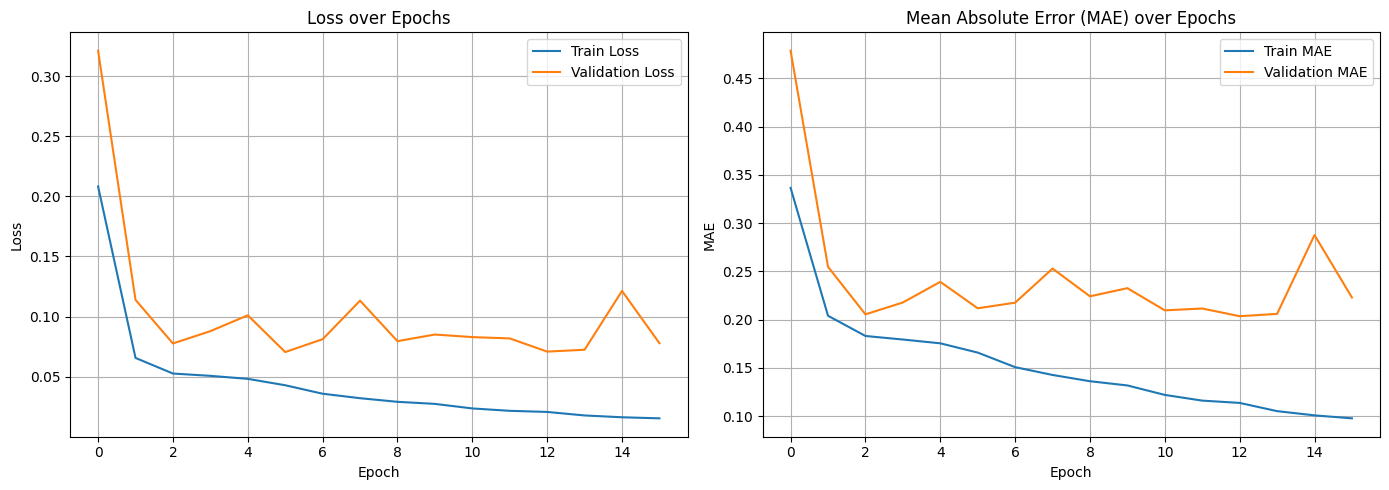

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0157 - mae: 0.0990 - val_loss: 0.0778 - val_mae: 0.2229


In [ ]:
# with strategy.scope():
# Create a callback to save the best model based on validation loss
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Instantiate the upgraded live plot callback
multi_metric_plot = MultiMetricLivePlot()

# Train
history = model.fit(
    train_images, train_labels_t,
    validation_data=(val_images, val_labels_t),
    epochs=70,  # More epochs because you're fine-tuning
    batch_size=8,
    callbacks=[checkpoint, early_stop, multi_metric_plot]
)




In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(test_images, test_labels_t)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0781 - mae: 0.2224
Test Loss: 0.07691936939954758, Test MAE: 0.22119462490081787


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict MMSE scores on the test set
predicted_mmse = model.predict(test_images)

# Convert back from scaled values (if using MinMaxScaler)
predicted_mmse = scaler.inverse_transform(predicted_mmse)
actual_mmse = scaler.inverse_transform(test_labels_t)

# Compute metrics
mse = mean_squared_error(actual_mmse, predicted_mmse)
mae = mean_absolute_error(actual_mmse, predicted_mmse)
rmse = np.sqrt(mse)
r2 = r2_score(actual_mmse, predicted_mmse)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step
Mean Squared Error (MSE): 40.8087
Mean Absolute Error (MAE): 5.0941
Root Mean Squared Error (RMSE): 6.3882
R² Score: -0.3995


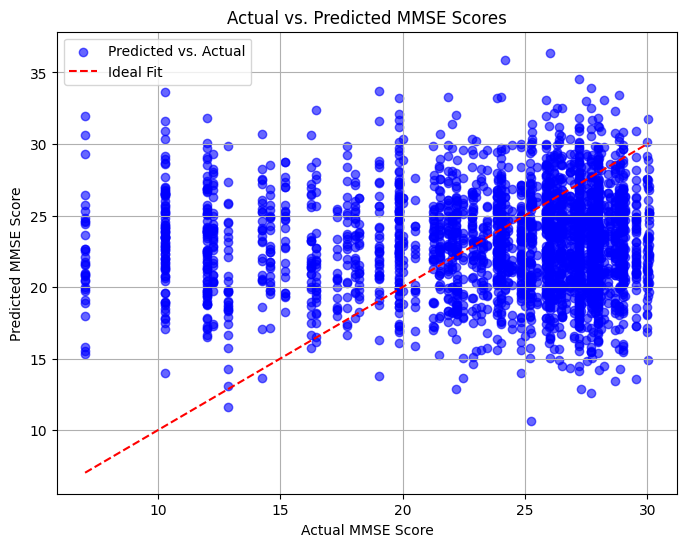

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_mmse, predicted_mmse, color='blue', alpha=0.6, label='Predicted vs. Actual')
plt.plot([min(actual_mmse), max(actual_mmse)], [min(actual_mmse), max(actual_mmse)], color='red', linestyle='--', label='Ideal Fit')

# Labels and Title
plt.xlabel('Actual MMSE Score')
plt.ylabel('Predicted MMSE Score')
plt.title('Actual vs. Predicted MMSE Scores')
plt.legend()
plt.grid(True)
plt.show()


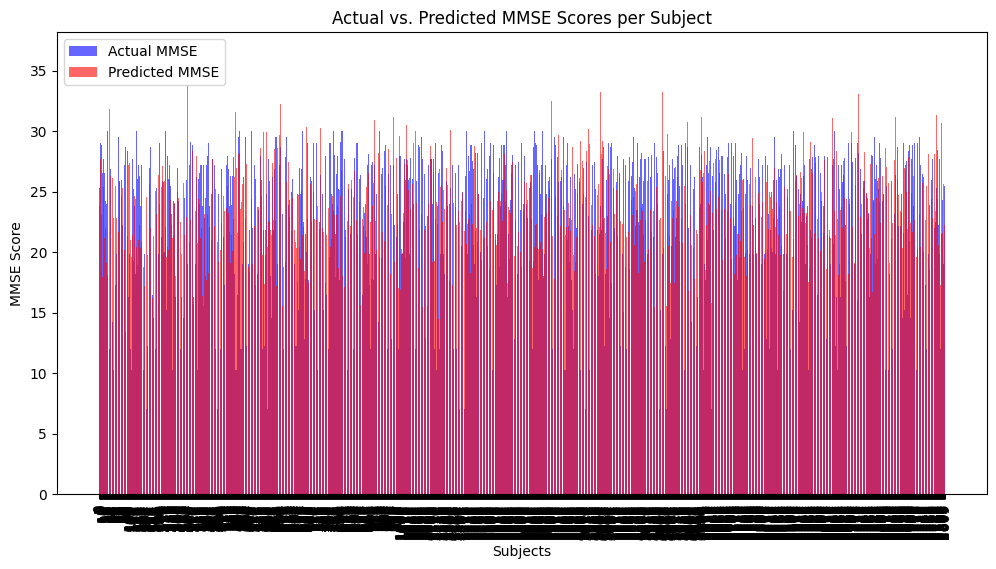

In [ ]:
subjects = np.arange(len(actual_mmse)).astype(str)  # Create subject indices as strings

plt.figure(figsize=(12, 6))
plt.bar(subjects, actual_mmse.flatten(), color='blue', alpha=0.6, label="Actual MMSE")
plt.bar(subjects, predicted_mmse.flatten(), color='red', alpha=0.6, label="Predicted MMSE")

# Labels and title
plt.xlabel("Subjects")
plt.ylabel("MMSE Score")
plt.title("Actual vs. Predicted MMSE Scores per Subject")
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
from pathlib import Path
import pandas as pd

# Step 1: Predict
preds = model.predict(test_images).flatten()
true = test_labels_t.flatten()

# Step 2: Extract subject IDs
subject_ids = [Path(p).parent.name for p in test_subjects]

# Step 3: Create DataFrame
df = pd.DataFrame({
    'Subject': subject_ids,
    'True_MMSE': true,
    'Predicted_MMSE': preds
})

# Step 4: Group by subject and average
grouped = df.groupby('Subject').mean().reset_index()

# Step 5: Assign for plotting
subject_names = grouped['Subject'].tolist()
subject_actual_mmse = grouped['True_MMSE'].tolist()
avg_predicted_mmse = grouped['Predicted_MMSE'].tolist()


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


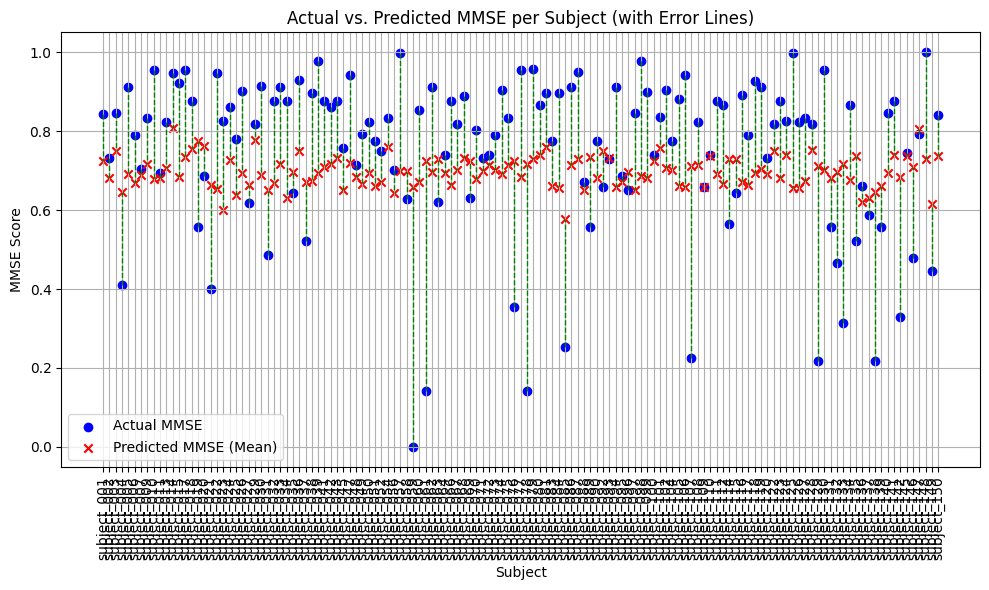

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(subject_names, subject_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(subject_names, avg_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(subject_names)):
    plt.plot([subject_names[i], subject_names[i]],
             [subject_actual_mmse[i], avg_predicted_mmse[i]],
             color='green', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


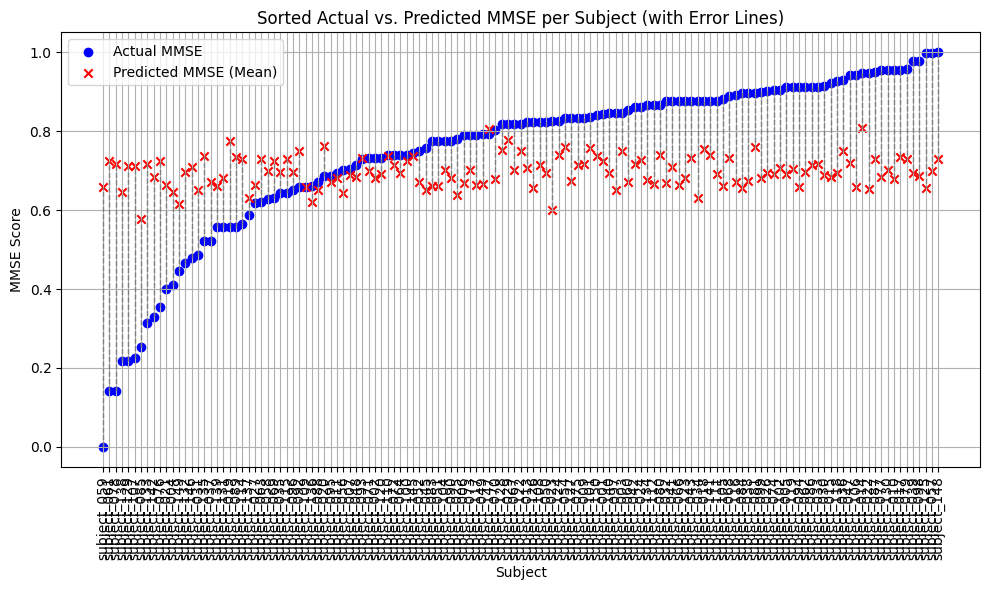

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort based on actual MMSE
sorted_indices = np.argsort(subject_actual_mmse)

# Sort the arrays
sorted_subject_names = np.array(subject_names)[sorted_indices]
sorted_actual_mmse = np.array(subject_actual_mmse)[sorted_indices]
sorted_predicted_mmse = np.array(avg_predicted_mmse)[sorted_indices]

plt.figure(figsize=(10, 6))

# Scatter points (sorted)
plt.scatter(sorted_subject_names, sorted_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(sorted_subject_names, sorted_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(sorted_subject_names)):
    plt.plot([sorted_subject_names[i], sorted_subject_names[i]],
             [sorted_actual_mmse[i], sorted_predicted_mmse[i]],
             color='gray', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Sorted Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# You already computed these earlier:
# sorted_actual_mmse  = array of actual MMSE per subject (shape: [num_subjects])
# sorted_predicted_mmse = array of average predicted MMSE per subject (shape: [num_subjects])

# These are what you need to use:
mae_subject = mean_absolute_error(sorted_actual_mmse, sorted_predicted_mmse)
mse_subject = mean_squared_error(sorted_actual_mmse, sorted_predicted_mmse)
r2_subject = r2_score(sorted_actual_mmse, sorted_predicted_mmse)

print(f"Subject-Based MAE: {mae_subject:.4f}")
print(f"Subject-Based MSE: {mse_subject:.4f}")
print(f"Subject-Based R²: {r2_subject:.4f}")


Subject-Based MAE: 0.1699
Subject-Based MSE: 0.0430
Subject-Based R²: -0.0457


#### Theta

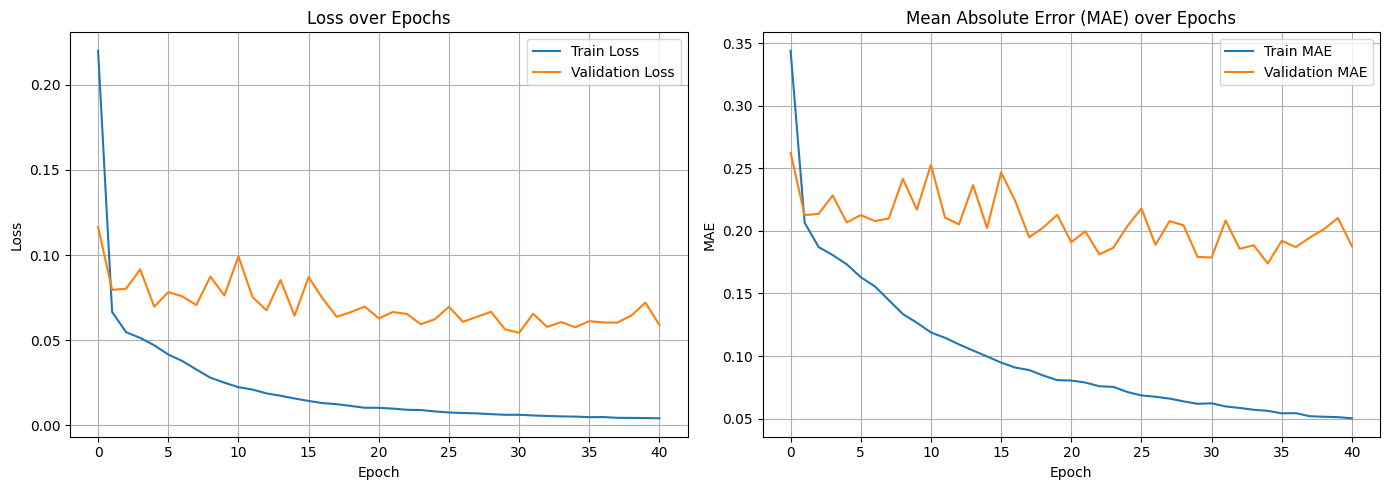

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0042 - mae: 0.0504 - val_loss: 0.0590 - val_mae: 0.1878


In [ ]:
# with strategy.scope():
# Create a callback to save the best model based on validation loss
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Instantiate the upgraded live plot callback
multi_metric_plot = MultiMetricLivePlot()

# Train
history = model.fit(
    train_images, train_labels_t,
    validation_data=(val_images, val_labels_t),
    epochs=70,  # More epochs because you're fine-tuning
    batch_size=8,
    callbacks=[checkpoint, early_stop, multi_metric_plot]
)




In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(test_images, test_labels_t)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0602 - mae: 0.1862
Test Loss: 0.05972449854016304, Test MAE: 0.1851850152015686


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict MMSE scores on the test set
predicted_mmse = model.predict(test_images)

# Convert back from scaled values (if using MinMaxScaler)
predicted_mmse = scaler.inverse_transform(predicted_mmse)
actual_mmse = scaler.inverse_transform(test_labels_t)

# Compute metrics
mse = mean_squared_error(actual_mmse, predicted_mmse)
mae = mean_absolute_error(actual_mmse, predicted_mmse)
rmse = np.sqrt(mse)
r2 = r2_score(actual_mmse, predicted_mmse)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step
Mean Squared Error (MSE): 31.6858
Mean Absolute Error (MAE): 4.2639
Root Mean Squared Error (RMSE): 5.6290
R² Score: -0.0867


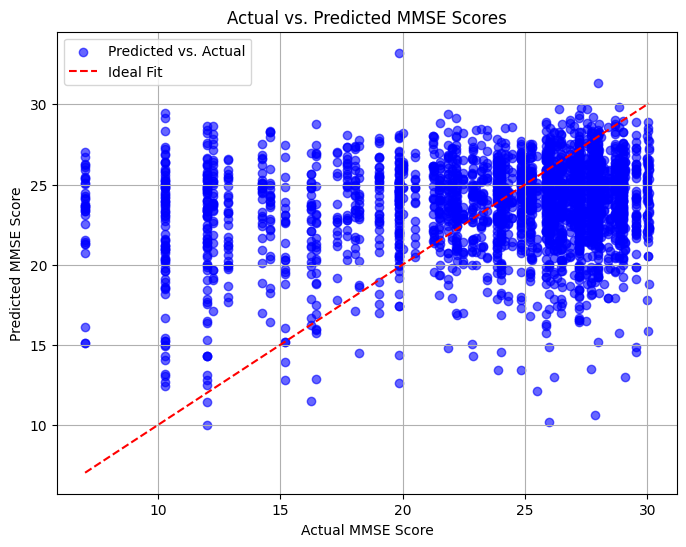

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_mmse, predicted_mmse, color='blue', alpha=0.6, label='Predicted vs. Actual')
plt.plot([min(actual_mmse), max(actual_mmse)], [min(actual_mmse), max(actual_mmse)], color='red', linestyle='--', label='Ideal Fit')

# Labels and Title
plt.xlabel('Actual MMSE Score')
plt.ylabel('Predicted MMSE Score')
plt.title('Actual vs. Predicted MMSE Scores')
plt.legend()
plt.grid(True)
plt.show()


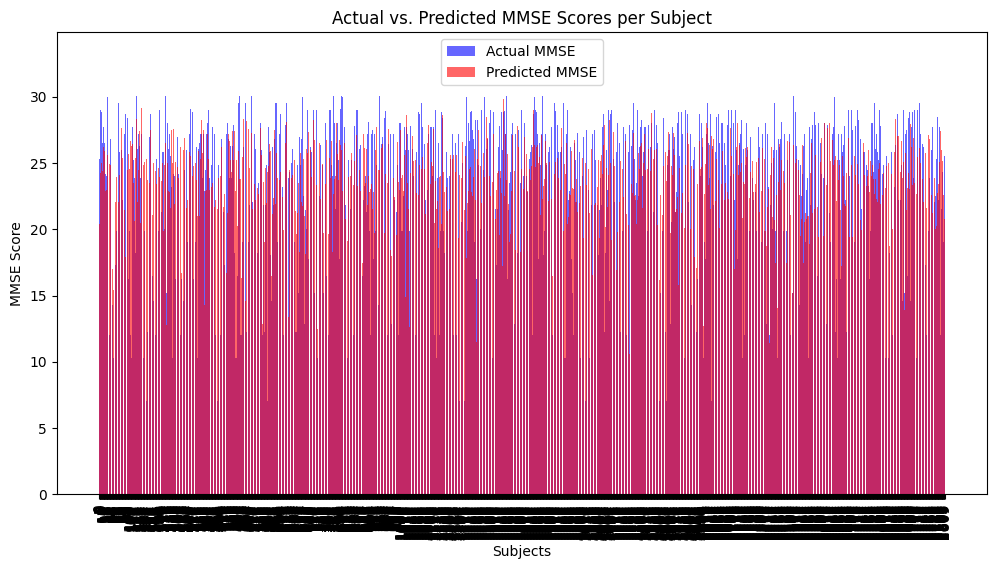

In [ ]:
subjects = np.arange(len(actual_mmse)).astype(str)  # Create subject indices as strings

plt.figure(figsize=(12, 6))
plt.bar(subjects, actual_mmse.flatten(), color='blue', alpha=0.6, label="Actual MMSE")
plt.bar(subjects, predicted_mmse.flatten(), color='red', alpha=0.6, label="Predicted MMSE")

# Labels and title
plt.xlabel("Subjects")
plt.ylabel("MMSE Score")
plt.title("Actual vs. Predicted MMSE Scores per Subject")
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
from pathlib import Path
import pandas as pd

# Step 1: Predict
preds = model.predict(test_images).flatten()
true = test_labels_t.flatten()

# Step 2: Extract subject IDs
subject_ids = [Path(p).parent.name for p in test_subjects]

# Step 3: Create DataFrame
df = pd.DataFrame({
    'Subject': subject_ids,
    'True_MMSE': true,
    'Predicted_MMSE': preds
})

# Step 4: Group by subject and average
grouped = df.groupby('Subject').mean().reset_index()

# Step 5: Assign for plotting
subject_names = grouped['Subject'].tolist()
subject_actual_mmse = grouped['True_MMSE'].tolist()
avg_predicted_mmse = grouped['Predicted_MMSE'].tolist()


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


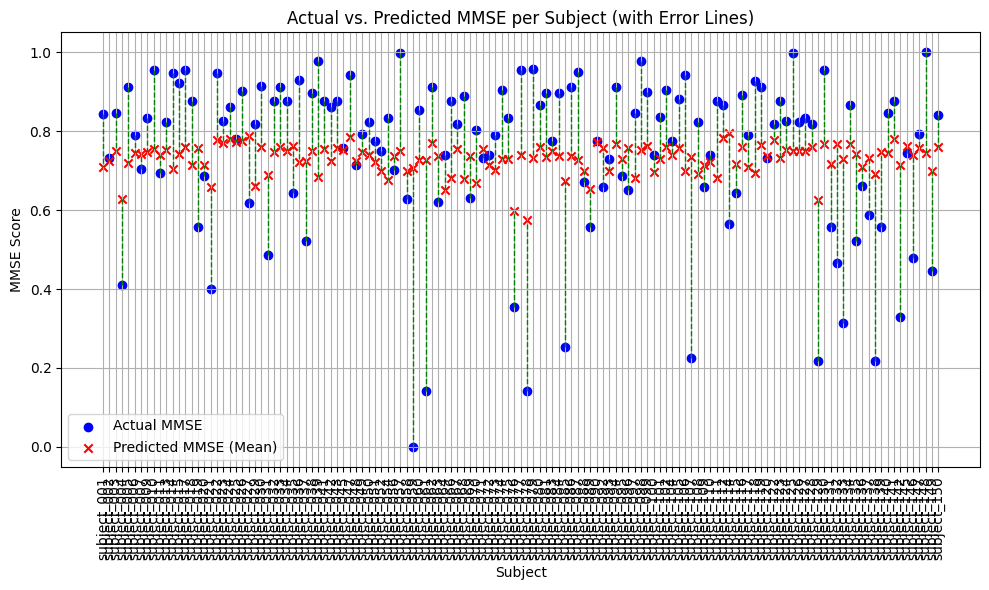

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(subject_names, subject_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(subject_names, avg_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(subject_names)):
    plt.plot([subject_names[i], subject_names[i]],
             [subject_actual_mmse[i], avg_predicted_mmse[i]],
             color='green', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


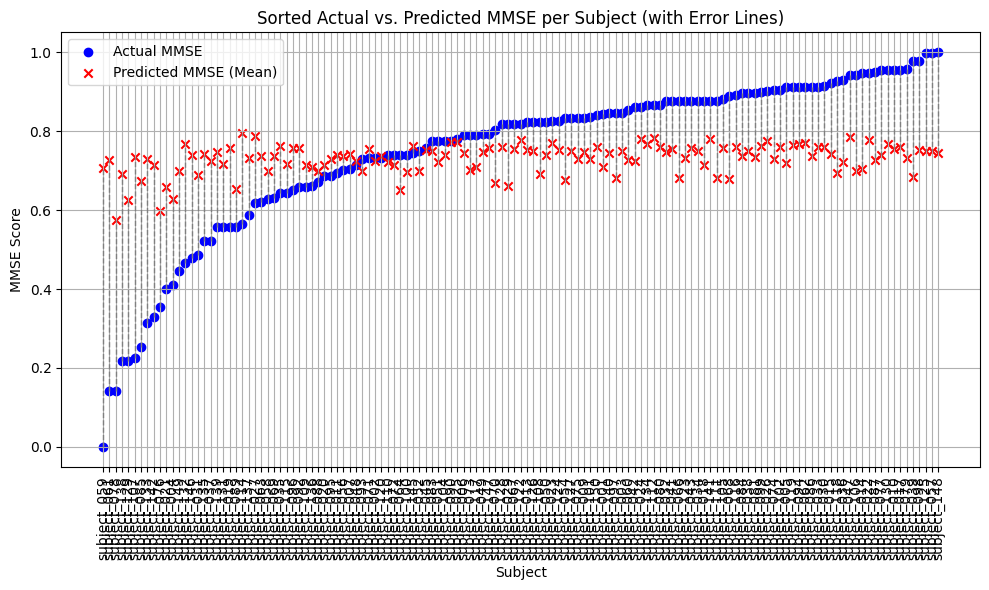

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort based on actual MMSE
sorted_indices = np.argsort(subject_actual_mmse)

# Sort the arrays
sorted_subject_names = np.array(subject_names)[sorted_indices]
sorted_actual_mmse = np.array(subject_actual_mmse)[sorted_indices]
sorted_predicted_mmse = np.array(avg_predicted_mmse)[sorted_indices]

plt.figure(figsize=(10, 6))

# Scatter points (sorted)
plt.scatter(sorted_subject_names, sorted_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(sorted_subject_names, sorted_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(sorted_subject_names)):
    plt.plot([sorted_subject_names[i], sorted_subject_names[i]],
             [sorted_actual_mmse[i], sorted_predicted_mmse[i]],
             color='gray', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Sorted Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# You already computed these earlier:
# sorted_actual_mmse  = array of actual MMSE per subject (shape: [num_subjects])
# sorted_predicted_mmse = array of average predicted MMSE per subject (shape: [num_subjects])

# These are what you need to use:
mae_subject = mean_absolute_error(sorted_actual_mmse, sorted_predicted_mmse)
mse_subject = mean_squared_error(sorted_actual_mmse, sorted_predicted_mmse)
r2_subject = r2_score(sorted_actual_mmse, sorted_predicted_mmse)

print(f"Subject-Based MAE: {mae_subject:.4f}")
print(f"Subject-Based MSE: {mse_subject:.4f}")
print(f"Subject-Based R²: {r2_subject:.4f}")


#### Alpha

In [ ]:
# with strategy.scope():
# Create a callback to save the best model based on validation loss
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Instantiate the upgraded live plot callback
multi_metric_plot = MultiMetricLivePlot()

# Train
history = model.fit(
    train_images, train_labels_t,
    validation_data=(val_images, val_labels_t),
    epochs=70,  # More epochs because you're fine-tuning
    batch_size=8,
    callbacks=[checkpoint, early_stop, multi_metric_plot]
)




In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(test_images, test_labels_t)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict MMSE scores on the test set
predicted_mmse = model.predict(test_images)

# Convert back from scaled values (if using MinMaxScaler)
predicted_mmse = scaler.inverse_transform(predicted_mmse)
actual_mmse = scaler.inverse_transform(test_labels_t)

# Compute metrics
mse = mean_squared_error(actual_mmse, predicted_mmse)
mae = mean_absolute_error(actual_mmse, predicted_mmse)
rmse = np.sqrt(mse)
r2 = r2_score(actual_mmse, predicted_mmse)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_mmse, predicted_mmse, color='blue', alpha=0.6, label='Predicted vs. Actual')
plt.plot([min(actual_mmse), max(actual_mmse)], [min(actual_mmse), max(actual_mmse)], color='red', linestyle='--', label='Ideal Fit')

# Labels and Title
plt.xlabel('Actual MMSE Score')
plt.ylabel('Predicted MMSE Score')
plt.title('Actual vs. Predicted MMSE Scores')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
subjects = np.arange(len(actual_mmse)).astype(str)  # Create subject indices as strings

plt.figure(figsize=(12, 6))
plt.bar(subjects, actual_mmse.flatten(), color='blue', alpha=0.6, label="Actual MMSE")
plt.bar(subjects, predicted_mmse.flatten(), color='red', alpha=0.6, label="Predicted MMSE")

# Labels and title
plt.xlabel("Subjects")
plt.ylabel("MMSE Score")
plt.title("Actual vs. Predicted MMSE Scores per Subject")
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(subject_names, subject_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(subject_names, avg_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(subject_names)):
    plt.plot([subject_names[i], subject_names[i]],
             [subject_actual_mmse[i], avg_predicted_mmse[i]],
             color='green', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort based on actual MMSE
sorted_indices = np.argsort(subject_actual_mmse)

# Sort the arrays
sorted_subject_names = np.array(subject_names)[sorted_indices]
sorted_actual_mmse = np.array(subject_actual_mmse)[sorted_indices]
sorted_predicted_mmse = np.array(avg_predicted_mmse)[sorted_indices]

plt.figure(figsize=(10, 6))

# Scatter points (sorted)
plt.scatter(sorted_subject_names, sorted_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(sorted_subject_names, sorted_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(sorted_subject_names)):
    plt.plot([sorted_subject_names[i], sorted_subject_names[i]],
             [sorted_actual_mmse[i], sorted_predicted_mmse[i]],
             color='gray', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Sorted Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# You already computed these earlier:
# sorted_actual_mmse  = array of actual MMSE per subject (shape: [num_subjects])
# sorted_predicted_mmse = array of average predicted MMSE per subject (shape: [num_subjects])

# These are what you need to use:
mae_subject = mean_absolute_error(sorted_actual_mmse, sorted_predicted_mmse)
mse_subject = mean_squared_error(sorted_actual_mmse, sorted_predicted_mmse)
r2_subject = r2_score(sorted_actual_mmse, sorted_predicted_mmse)

print(f"Subject-Based MAE: {mae_subject:.4f}")
print(f"Subject-Based MSE: {mse_subject:.4f}")
print(f"Subject-Based R²: {r2_subject:.4f}")


#### Beta

In [ ]:
# with strategy.scope():
# Create a callback to save the best model based on validation loss
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Instantiate the upgraded live plot callback
multi_metric_plot = MultiMetricLivePlot()

# Train
history = model.fit(
    train_images, train_labels_t,
    validation_data=(val_images, val_labels_t),
    epochs=70,  # More epochs because you're fine-tuning
    batch_size=8,
    callbacks=[checkpoint, early_stop, multi_metric_plot]
)




In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(test_images, test_labels_t)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict MMSE scores on the test set
predicted_mmse = model.predict(test_images)

# Convert back from scaled values (if using MinMaxScaler)
predicted_mmse = scaler.inverse_transform(predicted_mmse)
actual_mmse = scaler.inverse_transform(test_labels_t)

# Compute metrics
mse = mean_squared_error(actual_mmse, predicted_mmse)
mae = mean_absolute_error(actual_mmse, predicted_mmse)
rmse = np.sqrt(mse)
r2 = r2_score(actual_mmse, predicted_mmse)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_mmse, predicted_mmse, color='blue', alpha=0.6, label='Predicted vs. Actual')
plt.plot([min(actual_mmse), max(actual_mmse)], [min(actual_mmse), max(actual_mmse)], color='red', linestyle='--', label='Ideal Fit')

# Labels and Title
plt.xlabel('Actual MMSE Score')
plt.ylabel('Predicted MMSE Score')
plt.title('Actual vs. Predicted MMSE Scores')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
subjects = np.arange(len(actual_mmse)).astype(str)  # Create subject indices as strings

plt.figure(figsize=(12, 6))
plt.bar(subjects, actual_mmse.flatten(), color='blue', alpha=0.6, label="Actual MMSE")
plt.bar(subjects, predicted_mmse.flatten(), color='red', alpha=0.6, label="Predicted MMSE")

# Labels and title
plt.xlabel("Subjects")
plt.ylabel("MMSE Score")
plt.title("Actual vs. Predicted MMSE Scores per Subject")
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(subject_names, subject_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(subject_names, avg_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(subject_names)):
    plt.plot([subject_names[i], subject_names[i]],
             [subject_actual_mmse[i], avg_predicted_mmse[i]],
             color='green', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort based on actual MMSE
sorted_indices = np.argsort(subject_actual_mmse)

# Sort the arrays
sorted_subject_names = np.array(subject_names)[sorted_indices]
sorted_actual_mmse = np.array(subject_actual_mmse)[sorted_indices]
sorted_predicted_mmse = np.array(avg_predicted_mmse)[sorted_indices]

plt.figure(figsize=(10, 6))

# Scatter points (sorted)
plt.scatter(sorted_subject_names, sorted_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(sorted_subject_names, sorted_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(sorted_subject_names)):
    plt.plot([sorted_subject_names[i], sorted_subject_names[i]],
             [sorted_actual_mmse[i], sorted_predicted_mmse[i]],
             color='gray', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Sorted Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# You already computed these earlier:
# sorted_actual_mmse  = array of actual MMSE per subject (shape: [num_subjects])
# sorted_predicted_mmse = array of average predicted MMSE per subject (shape: [num_subjects])

# These are what you need to use:
mae_subject = mean_absolute_error(sorted_actual_mmse, sorted_predicted_mmse)
mse_subject = mean_squared_error(sorted_actual_mmse, sorted_predicted_mmse)
r2_subject = r2_score(sorted_actual_mmse, sorted_predicted_mmse)

print(f"Subject-Based MAE: {mae_subject:.4f}")
print(f"Subject-Based MSE: {mse_subject:.4f}")
print(f"Subject-Based R²: {r2_subject:.4f}")


#### Gamma

In [ ]:
# with strategy.scope():
# Create a callback to save the best model based on validation loss
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Instantiate the upgraded live plot callback
multi_metric_plot = MultiMetricLivePlot()

# Train
history = model.fit(
    train_images, train_labels_t,
    validation_data=(val_images, val_labels_t),
    epochs=70,  # More epochs because you're fine-tuning
    batch_size=8,
    callbacks=[checkpoint, early_stop, multi_metric_plot]
)




In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(test_images, test_labels_t)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict MMSE scores on the test set
predicted_mmse = model.predict(test_images)

# Convert back from scaled values (if using MinMaxScaler)
predicted_mmse = scaler.inverse_transform(predicted_mmse)
actual_mmse = scaler.inverse_transform(test_labels_t)

# Compute metrics
mse = mean_squared_error(actual_mmse, predicted_mmse)
mae = mean_absolute_error(actual_mmse, predicted_mmse)
rmse = np.sqrt(mse)
r2 = r2_score(actual_mmse, predicted_mmse)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_mmse, predicted_mmse, color='blue', alpha=0.6, label='Predicted vs. Actual')
plt.plot([min(actual_mmse), max(actual_mmse)], [min(actual_mmse), max(actual_mmse)], color='red', linestyle='--', label='Ideal Fit')

# Labels and Title
plt.xlabel('Actual MMSE Score')
plt.ylabel('Predicted MMSE Score')
plt.title('Actual vs. Predicted MMSE Scores')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
subjects = np.arange(len(actual_mmse)).astype(str)  # Create subject indices as strings

plt.figure(figsize=(12, 6))
plt.bar(subjects, actual_mmse.flatten(), color='blue', alpha=0.6, label="Actual MMSE")
plt.bar(subjects, predicted_mmse.flatten(), color='red', alpha=0.6, label="Predicted MMSE")

# Labels and title
plt.xlabel("Subjects")
plt.ylabel("MMSE Score")
plt.title("Actual vs. Predicted MMSE Scores per Subject")
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(subject_names, subject_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(subject_names, avg_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(subject_names)):
    plt.plot([subject_names[i], subject_names[i]],
             [subject_actual_mmse[i], avg_predicted_mmse[i]],
             color='green', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort based on actual MMSE
sorted_indices = np.argsort(subject_actual_mmse)

# Sort the arrays
sorted_subject_names = np.array(subject_names)[sorted_indices]
sorted_actual_mmse = np.array(subject_actual_mmse)[sorted_indices]
sorted_predicted_mmse = np.array(avg_predicted_mmse)[sorted_indices]

plt.figure(figsize=(10, 6))

# Scatter points (sorted)
plt.scatter(sorted_subject_names, sorted_actual_mmse, label='Actual MMSE', color='blue', marker='o')
plt.scatter(sorted_subject_names, sorted_predicted_mmse, label='Predicted MMSE (Mean)', color='red', marker='x')

# Draw lines between actual and predicted MMSE per subject
for i in range(len(sorted_subject_names)):
    plt.plot([sorted_subject_names[i], sorted_subject_names[i]],
             [sorted_actual_mmse[i], sorted_predicted_mmse[i]],
             color='gray', linestyle='--', linewidth=1)

plt.xticks(rotation=90)
plt.xlabel('Subject')
plt.ylabel('MMSE Score')
plt.title('Sorted Actual vs. Predicted MMSE per Subject (with Error Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# You already computed these earlier:
# sorted_actual_mmse  = array of actual MMSE per subject (shape: [num_subjects])
# sorted_predicted_mmse = array of average predicted MMSE per subject (shape: [num_subjects])

# These are what you need to use:
mae_subject = mean_absolute_error(sorted_actual_mmse, sorted_predicted_mmse)
mse_subject = mean_squared_error(sorted_actual_mmse, sorted_predicted_mmse)
r2_subject = r2_score(sorted_actual_mmse, sorted_predicted_mmse)

print(f"Subject-Based MAE: {mae_subject:.4f}")
print(f"Subject-Based MSE: {mse_subject:.4f}")
print(f"Subject-Based R²: {r2_subject:.4f}")


## New: Classification

In [ ]:
# Create a label mapping: AD -> 0, MCI -> 1, CNTRL -> 2
df['Subject_ID'] = df['ID pz'].astype(str).str.zfill(3)  # Converts 1 to '001', 4 to '004', etc.

diagnosis_mapping = {'AD': 0, 'MCI': 1, 'CNTRL': 2}

# Map the diagnosis labels to integers
df['Label'] = df['Diagnosi'].map(diagnosis_mapping)

# Verify
print(df[['Subject_ID', 'Diagnosi', 'Label']].head())


In [ ]:
# Set paths
organized_images_path = Path('/content/Organized_Images')

# Load images and corresponding labels
images = []
labels = []

# Iterate over each subject
for subject_id, label in zip(df['Subject_ID'], df['Label']):
    subject_folder = organized_images_path / f"subject_{subject_id}"

    if subject_folder.exists():
        for img_path in subject_folder.glob('*.jpg'):
            img = load_img(img_path, target_size=(224, 224))  # You can adjust size if needed
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)
    else:
        print(f"Subject folder not found for subject_{subject_id}")

# Convert to numpy arrays
images = np.array(images, dtype='float32') / 255.0  # Normalize
labels = np.array(labels)

print(f"Total images loaded: {len(images)}")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


In [ ]:
# Base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base model
base_model.trainable = False

# Build the model
inputs = Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)  # 3 classes

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


In [ ]:
# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    callbacks=[checkpoint, early_stopping]
)


In [ ]:
# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


## Define model

In [ ]:
def create_new_model(base_model, fine_tune_at=None):
    # Clone the architecture
    model = clone_model(base_model)
    # Copy the pretrained weights into the cloned model
    model.set_weights(base_model.get_weights())

    # Set the trainable property as needed
    if fine_tune_at is not None:
        for layer in model.layers[:fine_tune_at]:
            layer.trainable = False
        for layer in model.layers[fine_tune_at:]:
            layer.trainable = True
    else:
        for layer in model.layers:
            layer.trainable = False  # Freeze the base model layers

    # Add new layers on top of the base model
    x = model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(1, activation='linear')(x)  # Linear activation for regression

    model = Model(inputs=model.input, outputs=predictions)
    model.compile(
        loss='mean_squared_error',  # Use MSE for regression
        optimizer=Adam(learning_rate=1e-5, clipvalue=1.0),
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model


In [ ]:
def evaluate_model(true_values, predictions, iteration, model_name='model',
                   test_subjects=None, test_image_counts_per_subject=None,
                   id_to_mmse=None):
    """
    Evaluates the regression model's performance and generates evaluation plots.

    Args:
        true_values (array-like): Actual MMSE scores.
        predictions (array-like): Predicted MMSE scores by the model.
        iteration (int): Current iteration number for labeling plots.
        model_name (str): Name of the model for saving plots.
        test_subjects (array-like, optional): List of test subject folder paths.
        test_image_counts_per_subject (list, optional): Number of images per test subject.
        id_to_mmse (dict, optional): Mapping from subject ID to MMSE scores.

    Returns:
        dict: Dictionary containing calculated metrics.
    """
    # Calculate metrics
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)

    # Print metrics
    print(f"Iteration {iteration + 1} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

    # Scatter Plot of Predictions vs True Values
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=true_values, y=predictions, alpha=0.5)
    plt.xlabel('True MMSE')
    plt.ylabel('Predicted MMSE')
    plt.title(f'True vs Predicted MMSE - Iteration {iteration + 1}')
    # Plot a diagonal line for reference
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r--')
    scatter_plot_filename = f'{model_name}_scatter_iteration_{iteration + 1}.png'
    plt.savefig(scatter_plot_filename)
    plt.close()
    print(f"Scatter plot saved as {scatter_plot_filename}")

    # Residuals Plot
    residuals = true_values - predictions
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Residuals Distribution - Iteration {iteration + 1}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    residuals_plot_filename = f'{model_name}_residuals_iteration_{iteration + 1}.png'
    plt.savefig(residuals_plot_filename)
    plt.close()
    print(f"Residuals distribution plot saved as {residuals_plot_filename}")

    # (Optional) Per-Subject Aggregated Evaluation
    if test_subjects is not None and test_image_counts_per_subject is not None and id_to_mmse is not None:
        aggregated_true, aggregated_preds = aggregate_subject_predictions_weighted(
            test_subjects, test_image_counts_per_subject, predictions
        )

        # Remove any subjects with NaN true values
        valid_indices = ~np.isnan(aggregated_true)
        aggregated_true = aggregated_true[valid_indices]
        aggregated_preds = aggregated_preds[valid_indices]

        # Calculate aggregated metrics
        agg_mae = mean_absolute_error(aggregated_true, aggregated_preds)
        agg_mse = mean_squared_error(aggregated_true, aggregated_preds)
        agg_rmse = np.sqrt(agg_mse)
        agg_r2 = r2_score(aggregated_true, aggregated_preds)

        print(f"Aggregated - Iteration {iteration + 1} - MAE: {agg_mae:.4f}, MSE: {agg_mse:.4f}, RMSE: {agg_rmse:.4f}, R²: {agg_r2:.4f}")

        # Scatter Plot for Aggregated Predictions
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=aggregated_true, y=aggregated_preds, alpha=0.5)
        plt.xlabel('True MMSE')
        plt.ylabel('Predicted MMSE')
        plt.title(f'True vs Predicted MMSE (Aggregated) - Iteration {iteration + 1}')
        plt.plot([min(aggregated_true), max(aggregated_true)],
                 [min(aggregated_true), max(aggregated_true)], 'r--')
        agg_scatter_plot_filename = f'{model_name}_aggregated_scatter_iteration_{iteration + 1}.png'
        plt.savefig(agg_scatter_plot_filename)
        plt.close()
        print(f"Aggregated scatter plot saved as {agg_scatter_plot_filename}")

        # Return both individual and aggregated metrics
        return {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
            'Aggregated_MAE': agg_mae,
            'Aggregated_MSE': agg_mse,
            'Aggregated_RMSE': agg_rmse,
            'Aggregated_R2': agg_r2
        }

    # Return metrics as a dictionary
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }


In [ ]:
def aggregate_subject_predictions_weighted(test_subjects, test_image_counts_per_subject, test_predictions, confidence_scores=None):
    """
    Aggregates predictions for each subject using a weighted average.

    Args:
        test_subjects (array-like): List of test subject folder paths.
        test_image_counts_per_subject (list): Number of images per test subject.
        test_predictions (array-like): Predicted MMSE scores for all test images.
        confidence_scores (array-like, optional): Confidence scores for each prediction.

    Returns:
        tuple: Aggregated true MMSE scores and aggregated predicted MMSE scores per subject.
    """
    aggregated_true = []
    aggregated_preds = []
    start_idx = 0
    for folder, count in zip(test_subjects, test_image_counts_per_subject):
        end_idx = start_idx + count
        subject_preds = test_predictions[start_idx:end_idx]
        if confidence_scores is not None:
            subject_confidences = confidence_scores[start_idx:end_idx]
            subject_pred = np.average(subject_preds, weights=subject_confidences)
        else:
            subject_pred = np.mean(subject_preds)
        aggregated_preds.append(subject_pred)

        # Extract subject number from folder name
        subject_num = extract_numeric_part(folder)
        aggregated_true.append(id_to_mmse.get(subject_num, np.nan))

        start_idx = end_idx
    return np.array(aggregated_true), np.array(aggregated_preds)


In [ ]:
vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = create_new_model(vgg16_base_model)

(
    train_images, train_labels_t,
    val_images, val_labels_t,
    test_images, test_labels_t,
    test_subjects, test_image_counts_per_subject
) = load_and_preprocess_data(subject_folders, mmse_scores)

# Shuffle training data
train_data = list(zip(train_images, train_labels_t))
np.random.shuffle(train_data)
train_images, train_labels_t = zip(*train_data)
train_images, train_labels_t = np.array(train_images), np.array(train_labels_t)
print(train_labels_t)
bb= train_labels_t

#### Train Function

In [ ]:
import matplotlib.pyplot as plt

def train_and_evaluate_model(base_model, subject_folders, mmse_scores, num_epochs=100, num_iterations=1, model_name='model'):
    mae_list, mse_list, rmse_list, r2_list = [], [], [], []
    agg_mae_list, agg_mse_list, agg_rmse_list, agg_r2_list = [], [], [], []

    # Lists to store loss data for plotting
    train_losses = []
    val_losses = []

    for iteration in range(num_iterations):
        print(f"\nIteration {iteration + 1}:")

        model = create_new_model(base_model)

        (
            train_images, train_labels_t,
            val_images, val_labels_t,
            test_images, test_labels_t,
            test_subjects, test_image_counts_per_subject
        ) = load_and_preprocess_data(subject_folders, mmse_scores)

        # Shuffle training data
        train_data = list(zip(train_images, train_labels_t))
        np.random.shuffle(train_data)
        train_images, train_labels_t = zip(*train_data)
        train_images, train_labels_t = np.array(train_images), np.array(train_labels_t)
        print(train_labels_t.shape)
        bb= train_labels_t
        # Shuffle validation data
        val_data = list(zip(val_images, val_labels_t))
        np.random.shuffle(val_data)
        val_images, val_labels_t = zip(*val_data)
        val_images, val_labels_t = np.array(val_images), np.array(val_labels_t)

        # Define callbacks
        checkpoint_dir = 'checkpoints'
        os.makedirs(checkpoint_dir, exist_ok=True)

        local_checkpoint_filepath = os.path.join(checkpoint_dir, f"{model_name}_best1_weights_iteration_{iteration + 1}.weights.h5")

        checkpoint_callback = ModelCheckpoint(
            filepath=local_checkpoint_filepath,
            monitor='val_mean_squared_error',
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1
        )

        early_stopping = EarlyStopping(
            monitor='val_mean_squared_error',
            patience=15,
            verbose=1,
            mode='min',
            restore_best_weights=True
        )

        lr_scheduler = LearningRateScheduler(lr_schedule)
        print(np.any(np.isnan(train_images)))  # Should be False
        print(np.any(np.isnan(train_labels_t)))  # Should be False
        # Check some sample images
        plt.imshow(train_images[0])
        plt.show()
        plt.imshow(train_images[30])
        plt.show()
        plt.imshow(train_images[70])
        plt.show()
        # Check if there are NaN values in images
        print("Checking for NaNs in labels:", np.isnan(mmse_scores).any())
        print("Checking for Infinities in labels:", np.isinf(mmse_scores).any())
        images, labels_t = load_images_and_labels(subject_folders, mmse_scores)

        print("Checking for NaNs in images:", np.isnan(images).any())
        print("Checking for Infinities in images:", np.isinf(images).any())



        # Train the model
        history = model.fit(
            train_images, train_labels_t,
            epochs=num_epochs,
            batch_size=16,
            validation_data=(val_images, val_labels_t),
            callbacks=[checkpoint_callback, early_stopping, lr_scheduler],
            verbose=1
        )

        # Collect loss data
        train_losses.append(history.history['loss'])  # Training loss
        val_losses.append(history.history['val_loss'])  # Validation loss

        # Load the best weights
        model.load_weights(local_checkpoint_filepath)

        # Evaluate on test data
        test_predictions = model.predict(test_images).flatten()

        # Display predictions and actual values
        print("\nPredictions vs Actual MMSE Values:")
        for i, (pred, actual) in enumerate(zip(test_predictions, test_labels_t)):
            print(f"Sample {i + 1}: Predicted MMSE = {pred:.2f}, Actual MMSE = {actual:.2f}")

        # Call evaluate_model function with aggregation
        metrics = evaluate_model(
            true_values=test_labels_t,
            predictions=test_predictions,
            iteration=iteration,
            model_name=model_name,
            test_subjects=test_subjects,
            test_image_counts_per_subject=test_image_counts_per_subject,
            id_to_mmse=id_to_mmse  # Ensure this dictionary is accessible
        )

        # Append individual metrics
        mae_list.append(metrics['MAE'])
        mse_list.append(metrics['MSE'])
        rmse_list.append(metrics['RMSE'])
        r2_list.append(metrics['R2'])

        # Append aggregated metrics if available
        if 'Aggregated_MAE' in metrics:
            agg_mae_list.append(metrics['Aggregated_MAE'])
            agg_mse_list.append(metrics['Aggregated_MSE'])
            agg_rmse_list.append(metrics['Aggregated_RMSE'])
            agg_r2_list.append(metrics['Aggregated_R2'])

    print("\nAverage Metrics Across Iterations:")
    print(f"Average MAE: {np.mean(mae_list):.4f}")
    print(f"Average MSE: {np.mean(mse_list):.4f}")
    print(f"Average RMSE: {np.mean(rmse_list):.4f}")
    print(f"Average R²: {np.mean(r2_list):.4f}")

    # If aggregated metrics are collected, print their averages as well
    if agg_mae_list:
        print(f"Average Aggregated MAE: {np.mean(agg_mae_list):.4f}")
        print(f"Average Aggregated MSE: {np.mean(agg_mse_list):.4f}")
        print(f"Average Aggregated RMSE: {np.mean(agg_rmse_list):.4f}")
        print(f"Average Aggregated R²: {np.mean(agg_r2_list):.4f}")

    # Plotting training and validation losses
    plt.figure(figsize=(12, 6))

    # Plot for all iterations
    for i in range(num_iterations):
        plt.plot(range(1, len(train_losses[i]) + 1), train_losses[i], label=f'Train Loss Iteration {i+1}')
        plt.plot(range(1, len(val_losses[i]) + 1), val_losses[i], label=f'Val Loss Iteration {i+1}')

    plt.title(f'{model_name} - Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    elif epoch < 40:
        return lr * 0.95
    else:
        return lr * 0.85
# def exponential_decay(epoch, lr):
#     k = 0.1
#     return lr * np.exp(-k*epoch)


## Train - Delta Band

#### VGG16

In [ ]:
# Now you can create and compile your model inside the strategy scope
# with strategy.scope():
    # Initialize the base model
vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = create_new_model(vgg16_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


# vgg16_base_model.summary()

# Define the model name
model_name = 'vgg16_plv_images_regression'

# Train and evaluate the model
train_and_evaluate_model(
    base_model=vgg16_base_model,
    subject_folders=subject_folders,
    mmse_scores=mmse_scores,
    num_epochs=100,
    num_iterations=1,
    model_name=model_name
)


In [ ]:
# # Suppose you have confidence scores (e.g., model's certainty)
# # confidence_scores = get_confidence_scores(test_images)  # Define this function as needed

# aggregated_true, aggregated_preds = aggregate_subject_predictions_weighted(
#     test_subjects, test_image_counts_per_subject, test_predictions
#     # , confidence_scores=confidence_scores  # Uncomment if using
# )


#### ResNet50

In [ ]:
# ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# ResNet50_base_model.summary()

In [ ]:
# model_name = 'ResNet50_plv_images'
# train_and_evaluate_model(ResNet50_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(ResNet50_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet50_base_model.summary()

    # Define the model name
    model_name = 'ResNet50_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


#### Densenet121

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    DenseNet121_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(DenseNet121_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    DenseNet121_base_model.summary()

    # Define the model name
    model_name = 'DenseNet121_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# Dense_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Dense_base_model.summary()

In [ ]:
# model_name = 'Densenet121_plv_images'
# train_and_evaluate_model(Dense_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### MobileNet V2

In [ ]:

from tensorflow.keras.applications import MobileNetV2

# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(MobileNetV2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    MobileNetV2_base_model.summary()

    # Define the model name
    model_name = 'MobileNetV2_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# from tensorflow.keras.applications import MobileNetV2

# MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# MobileNetV2_base_model.summary()

In [ ]:
# model_name = 'mobilenetv2_plv_images'
# train_and_evaluate_model(MobileNetV2_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### ResNet 18


In [ ]:
# ResNet18 Base Model (Custom)
def ResNet18(input_shape=(224, 224, 3)):
    inputs = tf.keras.layers.Input(shape=input_shape)
    # Custom ResNet18 layers would go here (for demonstration, we use ResNet50 base model)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

ResNet18_base_model = ResNet18()
train_and_evaluate_model(ResNet18_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet18_base_model = ResNet18()
    # model = create_new_model(EfficientNetB2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet18_base_model.summary()

    # Define the model name
    model_name = 'ResNet18_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=ResNet18_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


## EfficientNet

In [ ]:
def build_efficientnet_model():
    base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze base model during initial training

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='linear')(x)  # Linear activation for regression

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])
    return model


In [ ]:
def fine_tune_model(base_model, initial_model):
    # Unfreeze top layers of base_model for fine-tuning
    base_model.trainable = True

    # Optionally freeze all layers except top N
    fine_tune_at = 300  # Only train last ~100 layers (EfficientNetB2 has 479 total)
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    # Recompile with lower learning rate for fine-tuning
    initial_model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
    return initial_model


In [ ]:
# Load and preprocess all data
(train_images, train_labels,
 val_images, val_labels,
 test_images, test_labels,
 test_subjects, test_image_counts_per_subject) = load_and_preprocess_data(subject_folders, mmse_scores)

# Build the model
model = build_efficientnet_model()
model.summary()

# Define callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Fine-tune the model
model = fine_tune_model(model.get_layer(index=1), model)  # index=1 is the EfficientNet base

history_fine = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=10,
    batch_size=16,  # Smaller batch size for Colab
    callbacks=callbacks
)


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'] + history_fine.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'] + history_fine.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training & Validation MAE with Fine-Tuning')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predict MMSE scores for all test images
predictions = model.predict(test_images)

# Rescale predictions and labels back to original MMSE scale
predictions_rescaled = scaler.inverse_transform(predictions)
test_labels_rescaled = scaler.inverse_transform(test_labels)

# Compute average prediction per subject
averaged_predictions = []
averaged_labels = []

idx = 0
for count in test_image_counts_per_subject:
    subject_preds = predictions_rescaled[idx:idx+count]
    subject_labels = test_labels_rescaled[idx:idx+count]
    averaged_predictions.append(np.mean(subject_preds))
    averaged_labels.append(np.mean(subject_labels))
    idx += count

# Convert to numpy arrays
averaged_predictions = np.array(averaged_predictions)
averaged_labels = np.array(averaged_labels)

# Evaluation metrics
mae = mean_absolute_error(averaged_labels, averaged_predictions)
rmse = np.sqrt(mean_squared_error(averaged_labels, averaged_predictions))
r2 = r2_score(averaged_labels, averaged_predictions)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


In [ ]:
# Predict again with fine-tuned model
final_predictions = model.predict(test_images)
final_predictions_rescaled = scaler.inverse_transform(final_predictions)

# دوباره میانگین‌گیری برای هر فرد
final_avg_preds, final_avg_labels = [], []
idx = 0
for count in test_image_counts_per_subject:
    sub_preds = final_predictions_rescaled[idx:idx+count]
    sub_labels = test_labels_rescaled[idx:idx+count]
    final_avg_preds.append(np.mean(sub_preds))
    final_avg_labels.append(np.mean(sub_labels))
    idx += count

final_avg_preds = np.array(final_avg_preds)
final_avg_labels = np.array(final_avg_labels)

# ارزیابی نهایی
mae = mean_absolute_error(final_avg_labels, final_avg_preds)
rmse = np.sqrt(mean_squared_error(final_avg_labels, final_avg_preds))
r2 = r2_score(final_avg_labels, final_avg_preds)

print(f"[Final Evaluation] MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
